Data Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('amz_uk_price_prediction_dataset.csv')
data = pd.DataFrame(dataset)
data.head()
df = data.copy()
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Data Cleaning and Prepocessing


In [2]:
df.isnull().sum() # no nulls
df.columns
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Data Exploration


In [3]:
round(df.describe())

# Contengency table
df.groupby('boughtInLastMonth')['stars'].value_counts()
pd.crosstab(df['boughtInLastMonth'],df['stars'])


stars,0.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
boughtInLastMonth,,,,,,,,,,,,,,,,,,,,,
0,1223895,8335,2,21,75,142,390,142,171,241,...,54572,71163,89055,105042,114933,102236,71019,33649,9779,125178
50,1208,93,0,1,1,3,7,3,2,5,...,4272,5883,8034,10386,11938,10775,7159,2762,605,2035
100,392,40,1,1,1,1,6,1,1,0,...,3097,4660,6593,8521,9898,9296,6229,2015,380,908
200,90,7,0,0,0,2,0,0,0,0,...,1213,1788,2659,3774,4421,4044,2661,923,118,207
300,23,4,0,0,0,0,0,0,2,0,...,582,980,1693,2120,2514,2399,1563,558,62,85
400,15,2,0,0,0,0,0,0,1,0,...,352,552,1027,1346,1644,1642,1139,388,39,30
500,3,1,0,0,1,1,1,0,0,2,...,240,395,673,950,1221,1152,744,257,18,22
600,1,0,0,0,0,0,0,0,0,0,...,177,298,513,630,843,823,570,194,14,14
700,2,1,0,0,0,0,0,0,0,0,...,104,226,342,468,588,648,424,115,18,4


<Axes: xlabel='stars', ylabel='Count'>

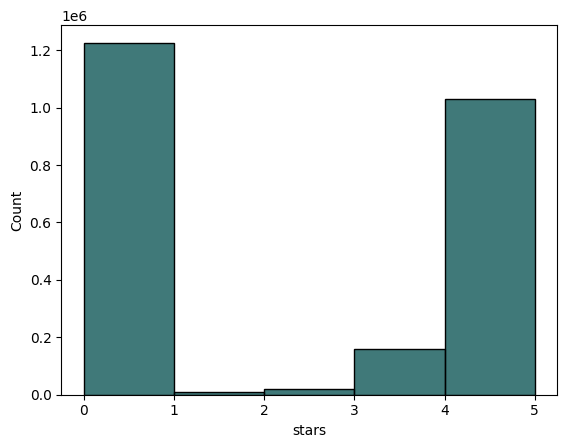

In [ ]:
# plotting an histogram
sns.histplot(df['stars'], bins=5, color='#004c4c')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df[['stars', 'price']].corr()

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Stars vs Price')
plt.show()


In [45]:
# binning colum start 
bins = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
df['stars_category'] = pd.cut(df['stars'],bins=bins,labels=labels,right=True, include_lowest=True)
df['stars_category'].isnull().sum()

np.int64(0)

In [ ]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

import pandas as pd


crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_prop = crosstab.apply(lambda x: x / x.sum(), axis=1)
crosstab_prop_sorted = crosstab_prop.sort_values(by=True, ascending=False)
print(crosstab)
print(crosstab_prop_sorted)


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]
isBestSeller                       False     True 
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339
...                               

In [ ]:
# Chi-square Test

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi2 Stat: {chi2}, p-value: {p}")


Chi2 Stat: 36540.20270061387, p-value: 0.0


In [ ]:
# Cramér's V 
n = crosstab.sum().sum()  
phi2 = chi2 / n  
r, k = crosstab.shape  
cramer_v = np.sqrt(phi2 / min(k - 1, r - 1))

print(f"Cramér's V: {cramer_v}")


Cramér's V: 0.1222829439760564


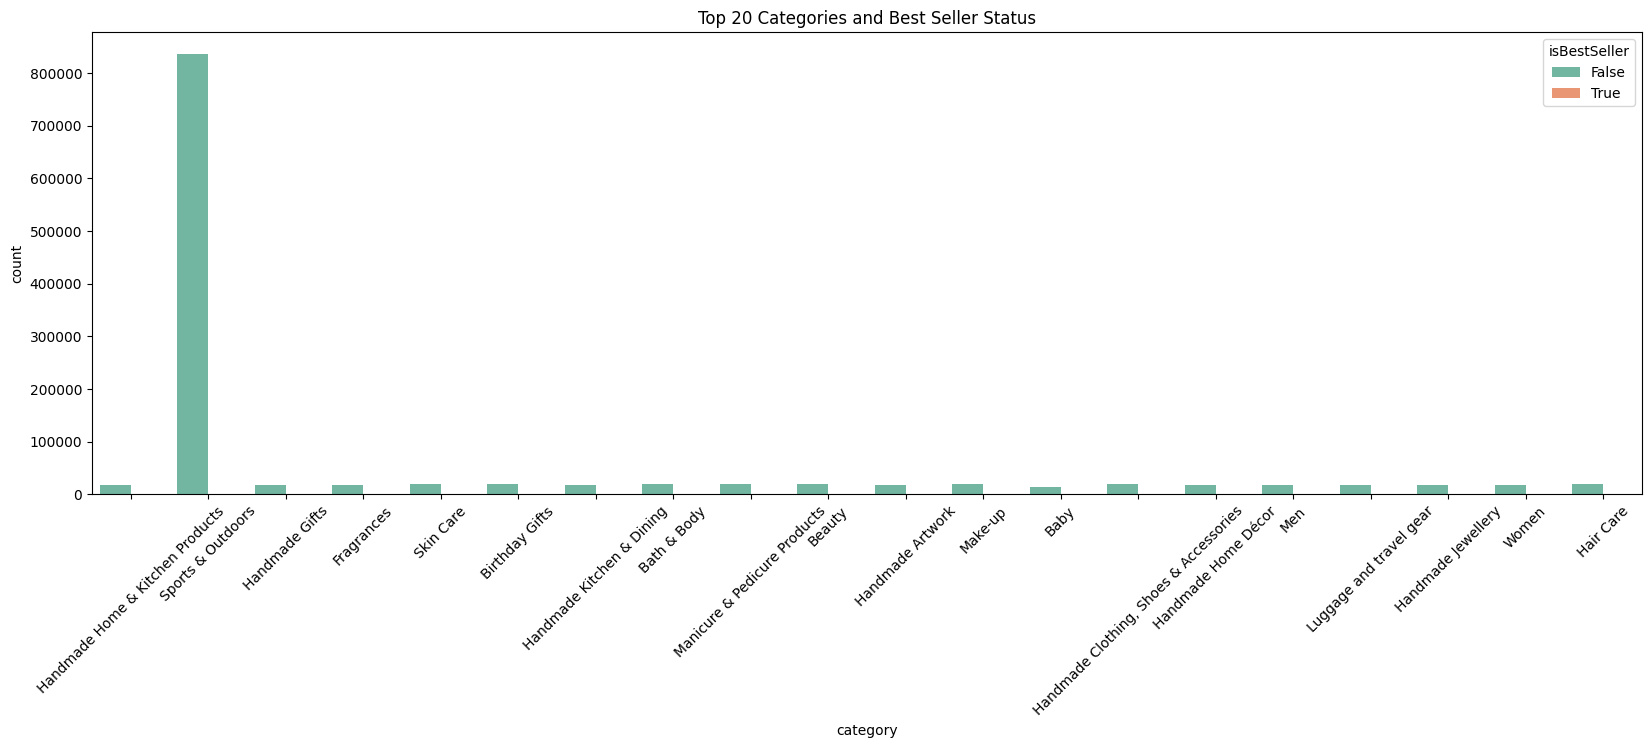

In [12]:
top_categories = df['category'].value_counts().head(20).index
df_top_categories = df[df['category'].isin(top_categories)]

plt.figure(figsize=(20, 6))
sns.countplot(data=df_top_categories, x='category', hue='isBestSeller', palette='Set2')
plt.xticks(rotation=45)
plt.title('Top 20 Categories and Best Seller Status')
plt.show()

plt.show()


   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


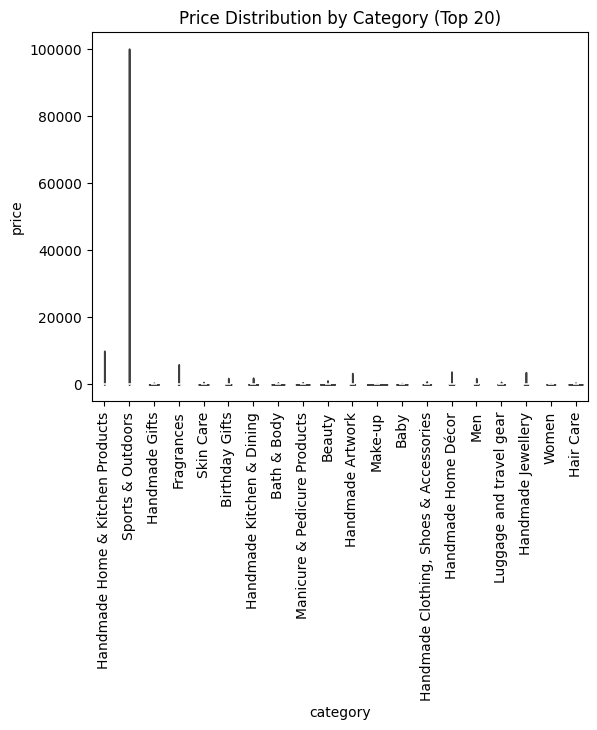

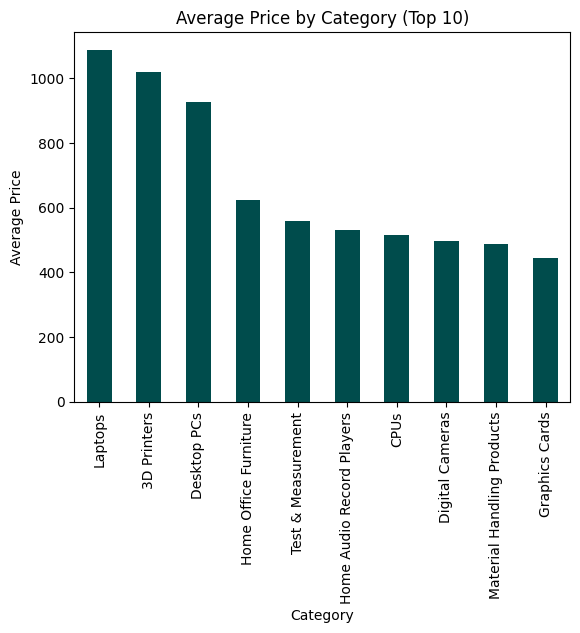

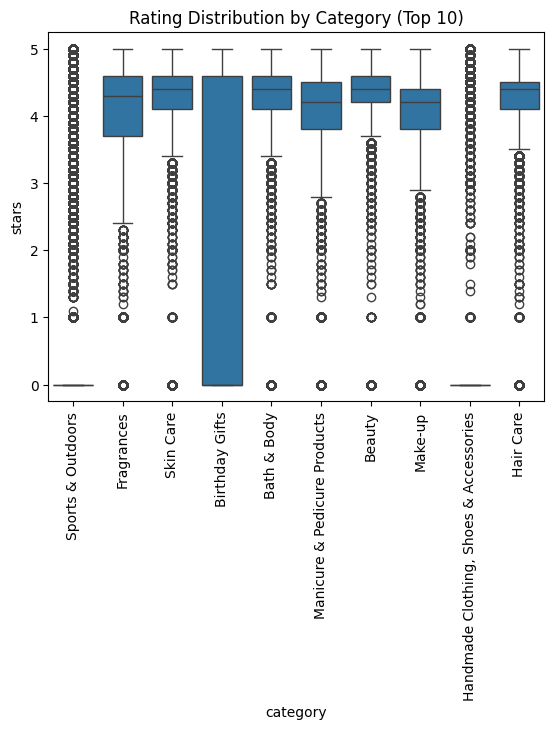

In [13]:
## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Remove outliers
df_cleaned = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Display cleaned data
print(df_cleaned.head())

# Violin plot of price across categories (top 20 categories based on count)
top_categories = df['category'].value_counts().nlargest(20).index
sns.violinplot(x='category', y='price', data=df[df['category'].isin(top_categories)])
plt.xticks(rotation=90)
plt.title('Price Distribution by Category (Top 20)')
plt.show()

# Bar chart of average price for top 10 categories
top_categories_avg_price = df.groupby('category')['price'].mean().nlargest(10)
top_categories_avg_price.plot(kind='bar', color='#004c4c')
plt.title('Average Price by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

# Box plot of ratings by category (top 10 categories based on count)
top_categories_ratings = df['category'].value_counts().nlargest(10).index
sns.boxplot(x='category', y='stars', data=df[df['category'].isin(top_categories_ratings)])
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category (Top 10)')
plt.show()
